# EDA

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.show()

In [2]:
df = pd.read_csv('../data/raw/calories.csv')

In [3]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [5]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


## Como se distribuye el target?

<Axes: title={'center': 'Distribución de Calorías Quemadas'}, ylabel='Frequency'>

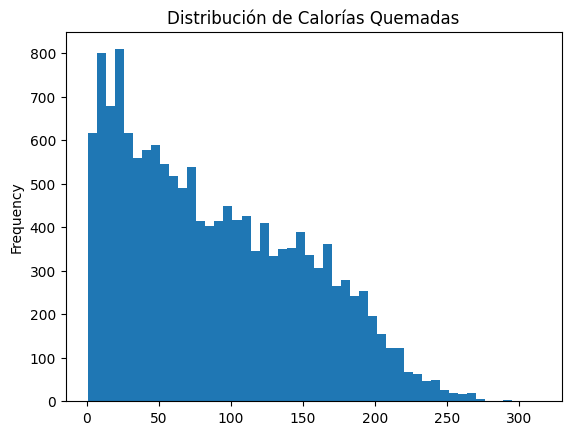

In [12]:
df['Calories'].plot(kind='hist', bins=50, title='Distribución de Calorías Quemadas')

## Como se distribuyen las variables numericas

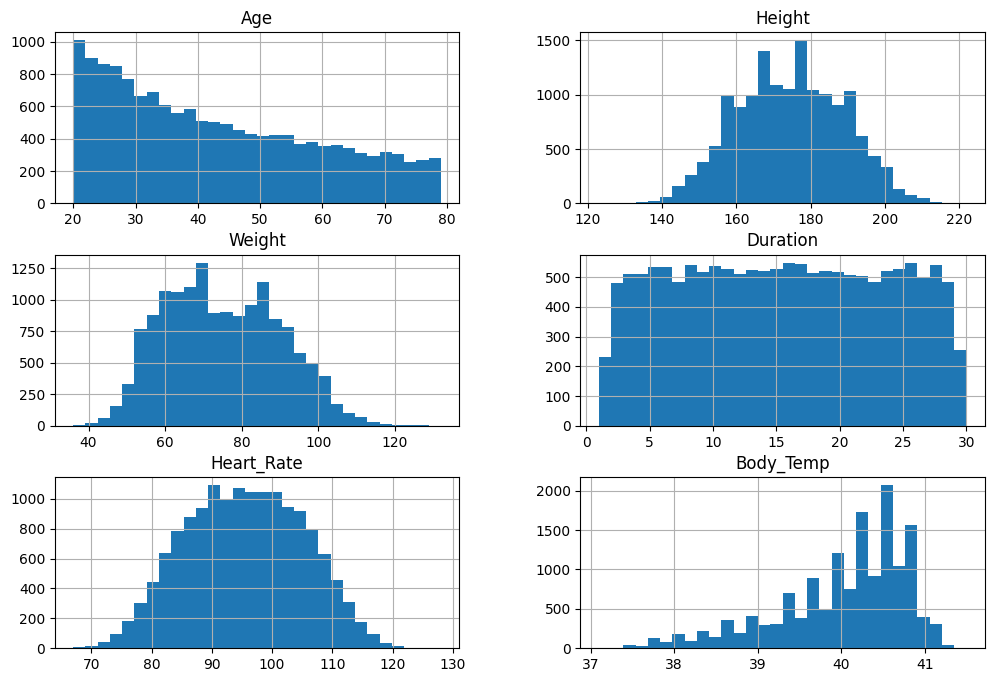

In [15]:
df[['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']].hist(bins=30, figsize=(12, 8))
plt.show()

In [26]:
x_vars=['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']

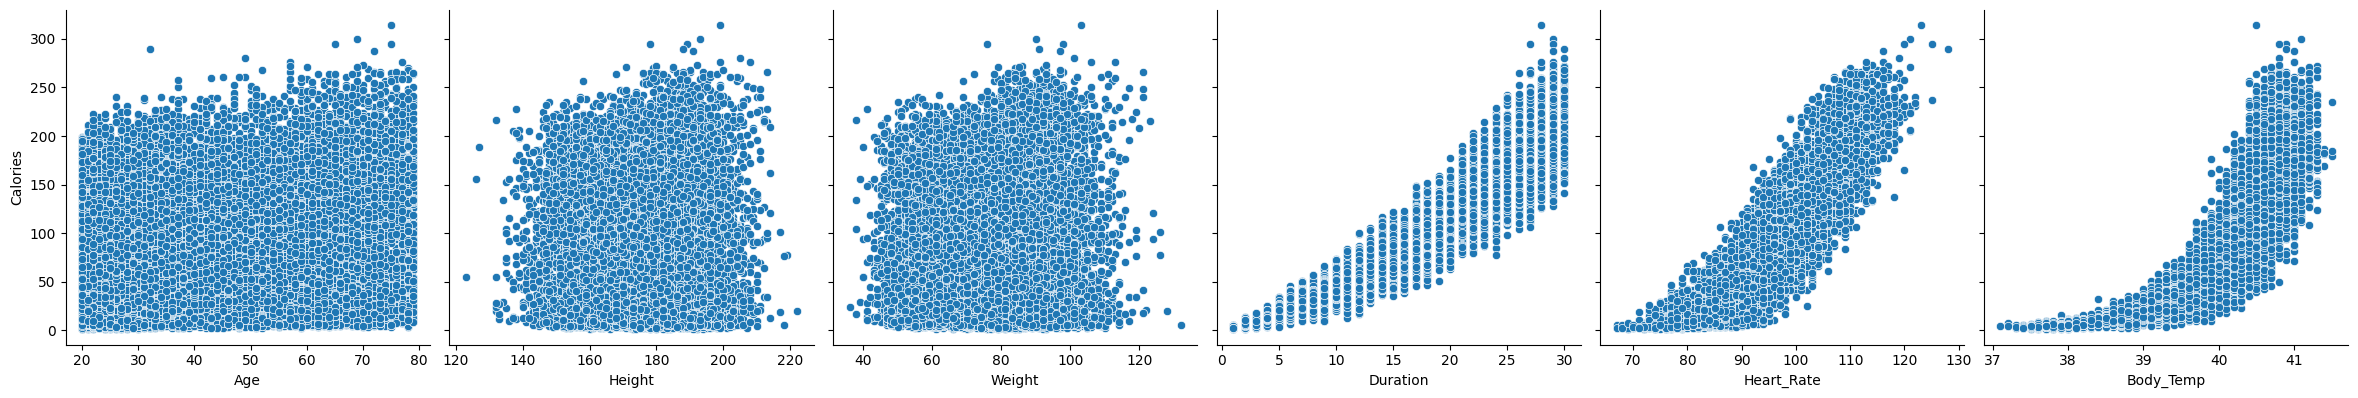

In [31]:
sns.pairplot(df, x_vars=x_vars, y_vars=['Calories'], height=4)
plt.show()

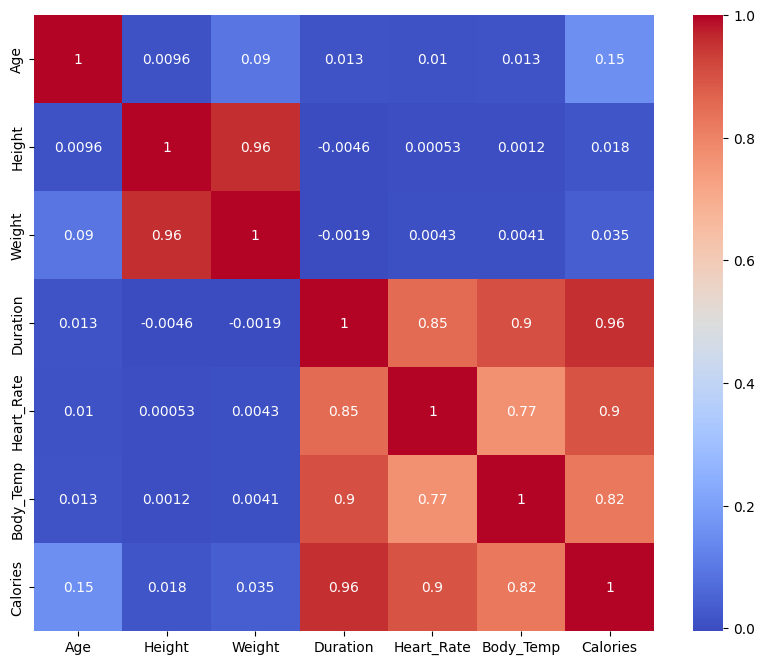

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop('User_ID', axis=1).corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

## Resultados iniciales

* La variable Calories tiene un sesgo positivo; log1p es una buena idea.
* No hay datos faltantes.
* Gender es categórica y necesita ser convertida a numérica.
* Las variables Duration, Heart_Rate y Body_Temp estan correlacionadas con el target.
* Se podrían crear nuevas características basadas en el conocimiento del dominio (como el BMI o fórmulas de Frecuencia Cardíaca Máxima).